# I. Jeux de données

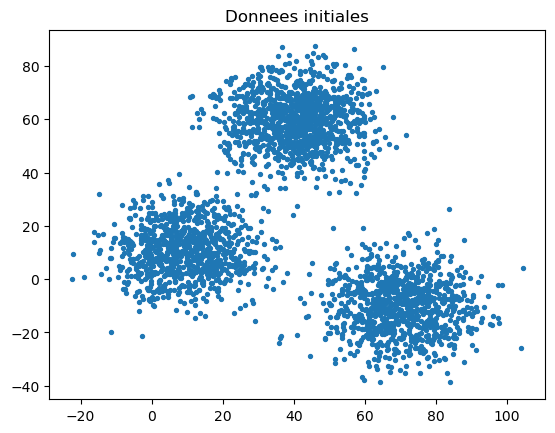

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
# Parser un fichier de donnees au format arff
# data est un tableau d ’ exemples avec pour chacun
# la liste des valeurs des features
#
# Dans les jeux de donnees consideres :
# il y a 2 features ( dimension 2 )
# Ex : [[ - 0 . 499261 , -0 . 0612356 ] ,
# [ - 1 . 51369 , 0 . 265446 ] ,
# [ - 1 . 60321 , 0 . 362039 ] , .....
# ]
#
# Note : chaque exemple du jeu de donnees contient aussi un
# numero de cluster . On retire cette information
path = './artificial/'
databrut = arff.loadarff(open(path + "xclara.arff", 'r'))
datanp = np.array([[x[0],x[1]] for x in databrut[0]])
# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [ - 0 . 499261 , -1 . 51369 , -1 . 60321 , ...]
# Ex pour f1 = [ - 0 . 0612356 , 0 . 265446 , 0 . 362039 , ...]
f0 = datanp[:,0] # tous les elements de la premiere colonne
f1 = datanp[:,1] # tous les elements de la deuxieme colonne
plt.scatter (f0 ,f1 ,s=8)
plt.title("Donnees initiales")
plt.show()

# II. Clustering k-Means

Appel KMeans pour une valeur fixée de k


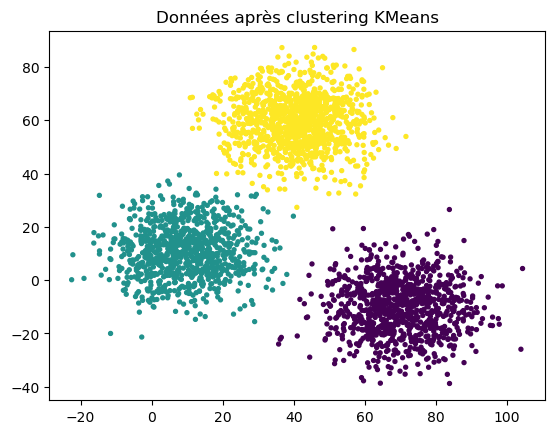

Nb clusters = 3 , Nb iter = 3 , Runtime = 324.55 ms


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import cluster

# Les données sont dans datanp (2 dimensions)
# f0 : valeurs sur la première dimension
# f1 : valeurs sur la deuxième dimension

print("Appel KMeans pour une valeur fixée de k")

# Start timing
tps1 = time.time()

# Number of clusters
k = 3

# Initialize and fit KMeans model
model = cluster.KMeans(n_clusters=k, init='k-means++')
model.fit(datanp)

# End timing
tps2 = time.time()

# Retrieve clustering results
labels = model.labels_
iteration = model.n_iter_

# Plot the clustered data
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Données après clustering KMeans")
plt.show()

# Print results
print("Nb clusters =", k, ", Nb iter =", iteration, ", Runtime =", round((tps2 - tps1) * 1000, 2), "ms")


## II.2. Intérêts de la méthode k-Means

In [20]:
def show_dataset(file):
    path = './artificial/'
    databrut = arff.loadarff(open(path + file + ".arff", 'r'))
    datanp = np.array([[x[0],x[1]] for x in databrut[0]])
    f0 = datanp[:,0] 
    f1 = datanp[:,1]
    plt.scatter (f0 ,f1 ,s=8)
    plt.title(file)
    plt.show()

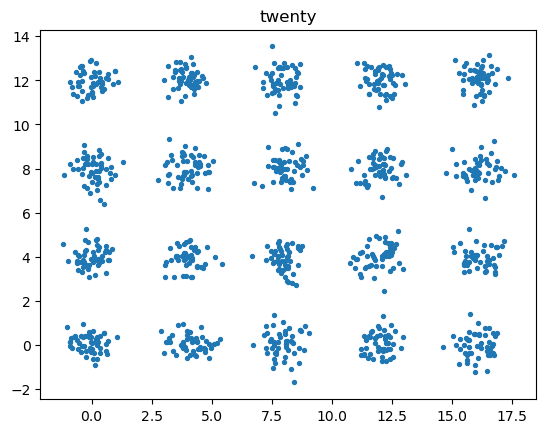

In [55]:
show_dataset("twenty")

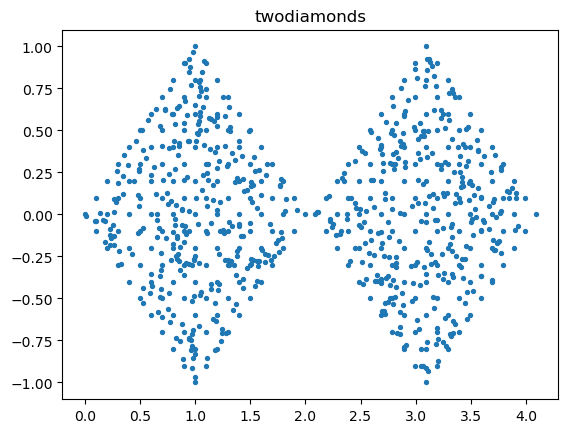

In [53]:
show_dataset("twodiamonds")

In [136]:
from sklearn.cluster import KMeans 
def k_means_clustering_fit(datanp, f0,f1,k):
    # Start timing
    tps1 = time.time()
    
    # Initialize and fit KMeans model
    model = cluster.KMeans(n_clusters=k, init='k-means++')
    model.fit(datanp)
    
    # End timing
    tps2 = time.time()
    
    # Retrieve clustering results
    labels = model.labels_
    iteration = model.n_iter_
    
    # Plot the clustered data
    plt.scatter(f0, f1, c=labels, s=8)
    plt.title("Données après clustering KMeans ")
    plt.show()
    
    # Print results
    print("Nb clusters =", k, ", Nb iter =", iteration, ", Runtime =", round((tps2 - tps1) * 1000, 2), "ms")
    return model

def agglomerative_clustering_fit(datanp, f0,f1,k):
    tps1 = time.time()
    model = cluster.AgglomerativeClustering(
        linkage='single',
        n_clusters=k
    )
    model = model.fit(datanp)
    tps2 = time.time()
    
    # Retrieve clustering results for k clusters
    labels = model.labels_
    kres = model.n_clusters_
    leaves = model.n_leaves_
    
    # Display clustering results
    plt.scatter(f0, f1, c=labels, s=8)
    plt.title("Résultat du clustering")
    plt.show()

    print("Nb clusters =", k, ", Nb iter =", iteration, ", Runtime =", round((tps2 - tps1) * 1000, 2), "ms")
    return model

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score
import numpy as np

def get_data(file):
    path = './artificial/'
    databrut = arff.loadarff(open(path + file + ".arff", 'r'))
    datanp = np.array([[x[0],x[1]] for x in databrut[0]])
    f0 = datanp[:,0] 
    f1 = datanp[:,1]
    return datanp, f0, f1

def evaluate_clustering(file, algo_name, ks):
    datanp, f0, f1 = get_data(file)
    sil_scores = []
    db_scores = []
    ch_scores = []
    for k in ks:
        if algo_name == "k_means":
            model = k_means_clustering_fit(datanp, f0, f1, k)
        else:
            model = agglomerative_clustering_fit(datanp, f0, f1, k)
        sil_scores.append(silhouette_score(datanp, model.fit_predict(datanp)))
        db_scores.append(davies_bouldin_score(datanp, model.fit_predict(datanp)))
        ch_scores.append(calinski_harabasz_score(datanp, model.fit_predict(datanp)))
    
        
    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # First subplot: Silhouette Score
    axes[0, 1].plot(ks, sil_scores, marker='o', linestyle='-', color='b')
    axes[0, 1].set_title("Silhouette Score vs Number of Clusters (k)")
    axes[0, 1].set_xlabel("Number of Clusters (k)")
    axes[0, 1].set_ylabel("Silhouette Score")
    axes[0, 1].grid(True)
    
    # Second subplot: Davies-Bouldin Index
    axes[1, 0].plot(ks, db_scores, marker='o', linestyle='-', color='r')
    axes[1, 0].set_title("Davies-Bouldin Index vs Number of Clusters (k)")
    axes[1, 0].set_xlabel("Number of Clusters (k)")
    axes[1, 0].set_ylabel("Davies-Bouldin Index")
    axes[1, 0].grid(True)
    
    # Third subplot: Calinski-Harabasz Index
    axes[1, 1].plot(ks, ch_scores, marker='o', linestyle='-', color='g')
    axes[1, 1].set_title("Calinski-Harabasz Index vs Number of Clusters (k)")
    axes[1, 1].set_xlabel("Number of Clusters (k)")
    axes[1, 1].set_ylabel("Calinski-Harabasz Index")
    axes[1, 1].grid(True)
    
    # Remove the unused subplot (axes[0, 0])
    axes[0, 0].axis('off')  # This will hide the subplot
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()




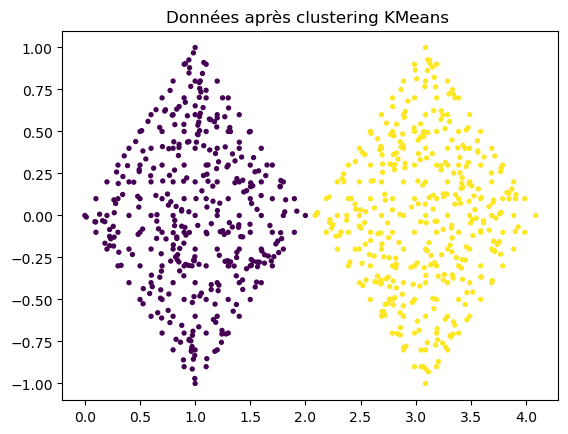

Nb clusters = 2 , Nb iter = 2 , Runtime = 4.25 ms


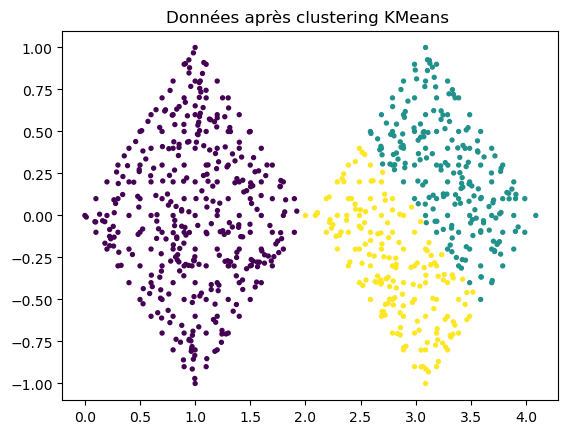

Nb clusters = 3 , Nb iter = 12 , Runtime = 2.52 ms


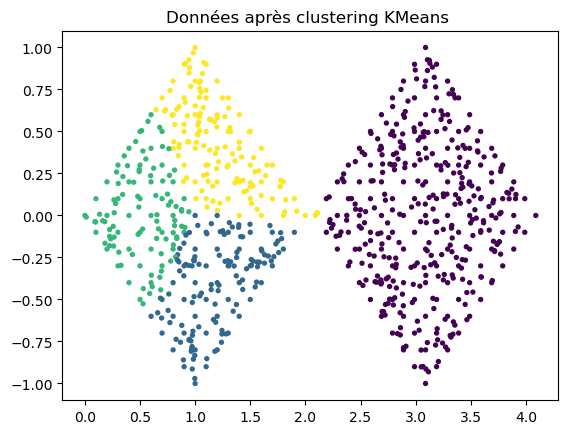

Nb clusters = 4 , Nb iter = 8 , Runtime = 2.46 ms


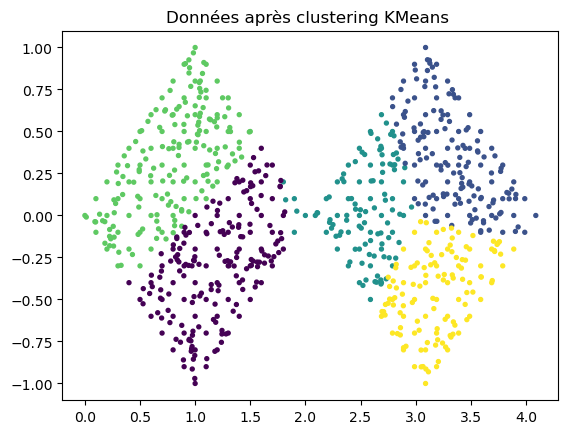

Nb clusters = 5 , Nb iter = 12 , Runtime = 2.62 ms


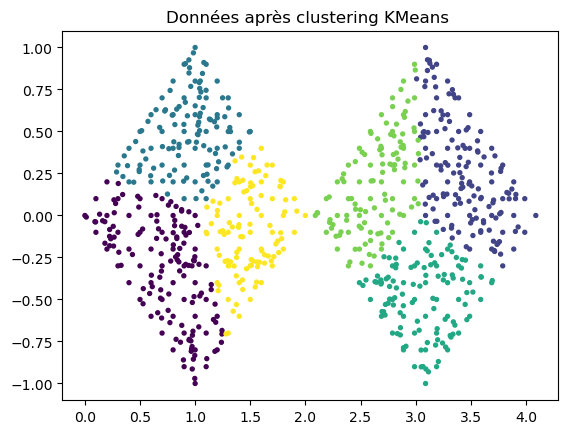

Nb clusters = 6 , Nb iter = 5 , Runtime = 3.36 ms


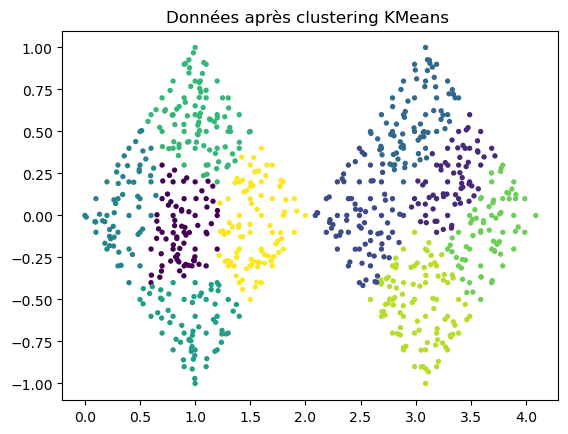

Nb clusters = 10 , Nb iter = 10 , Runtime = 3.84 ms


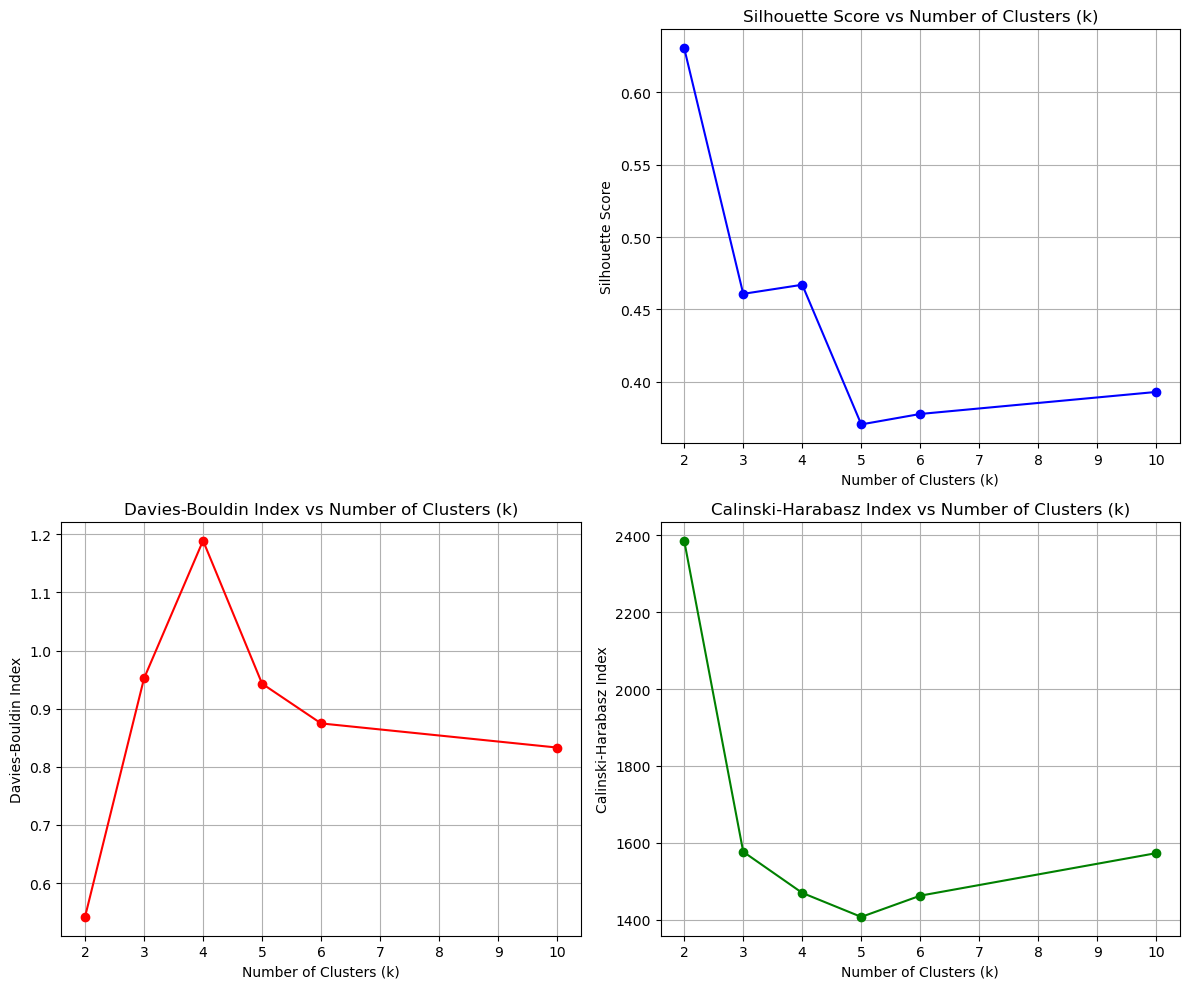

In [138]:
ks = [2,3,4,5,6,10]
evaluate_clustering("twodiamonds", "k_means", ks)

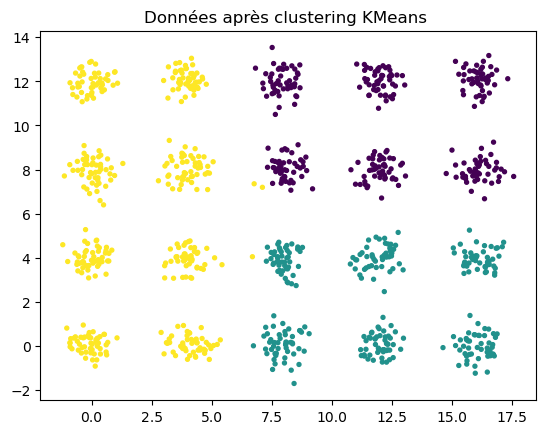

Nb clusters = 3 , Nb iter = 6 , Runtime = 7.11 ms


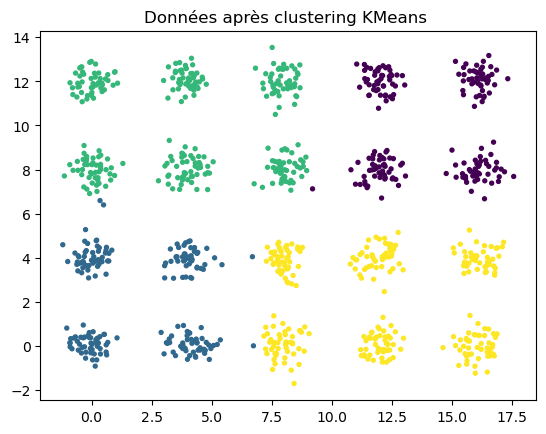

Nb clusters = 4 , Nb iter = 7 , Runtime = 2.08 ms


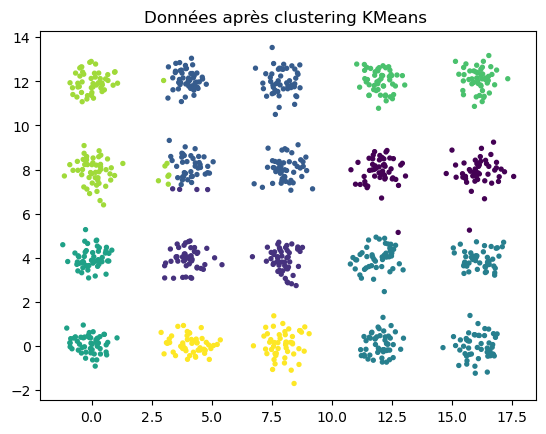

Nb clusters = 8 , Nb iter = 6 , Runtime = 2.5 ms


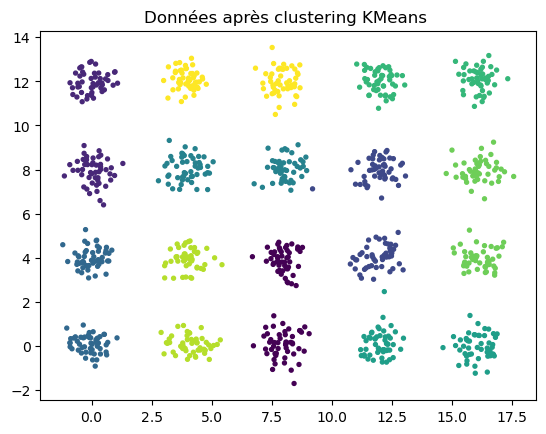

Nb clusters = 10 , Nb iter = 6 , Runtime = 2.61 ms


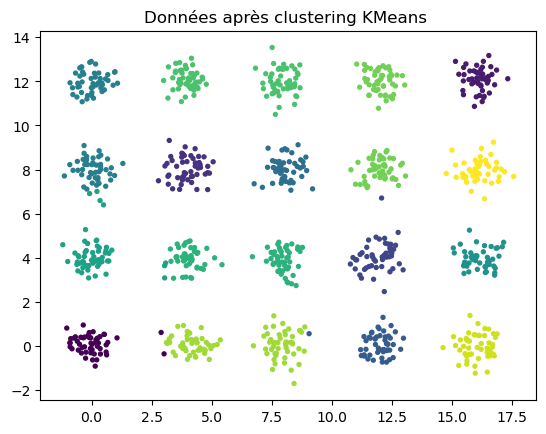

Nb clusters = 15 , Nb iter = 11 , Runtime = 2.83 ms


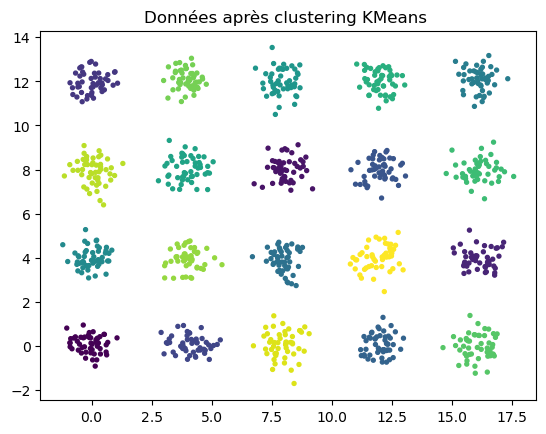

Nb clusters = 20 , Nb iter = 3 , Runtime = 3.73 ms


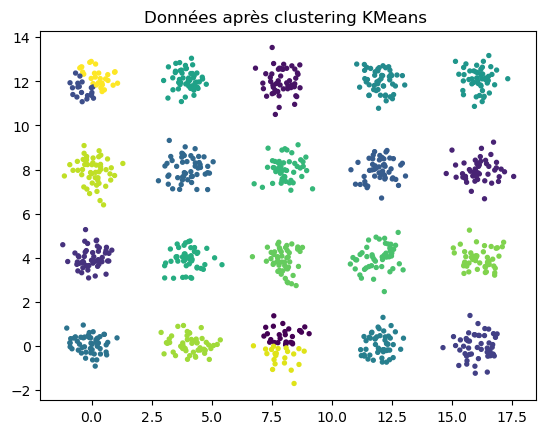

Nb clusters = 22 , Nb iter = 5 , Runtime = 3.17 ms


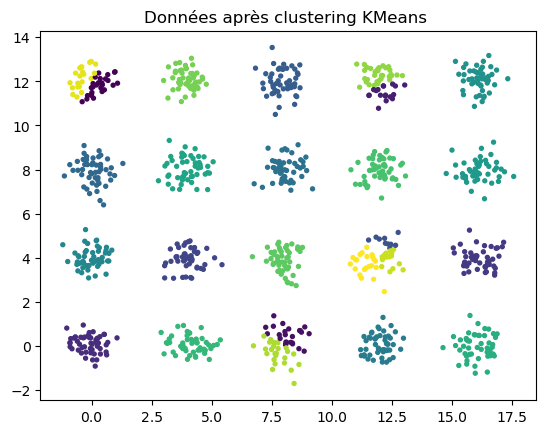

Nb clusters = 25 , Nb iter = 4 , Runtime = 3.34 ms


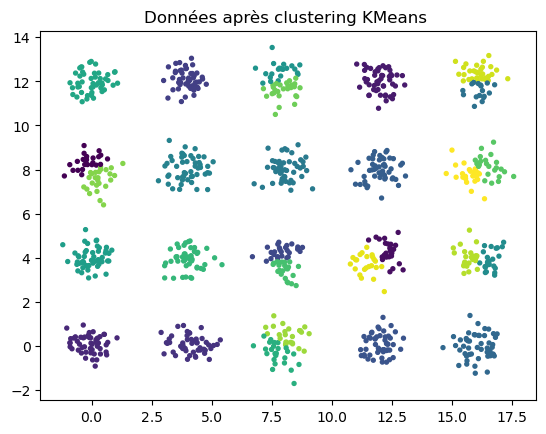

Nb clusters = 28 , Nb iter = 8 , Runtime = 3.97 ms


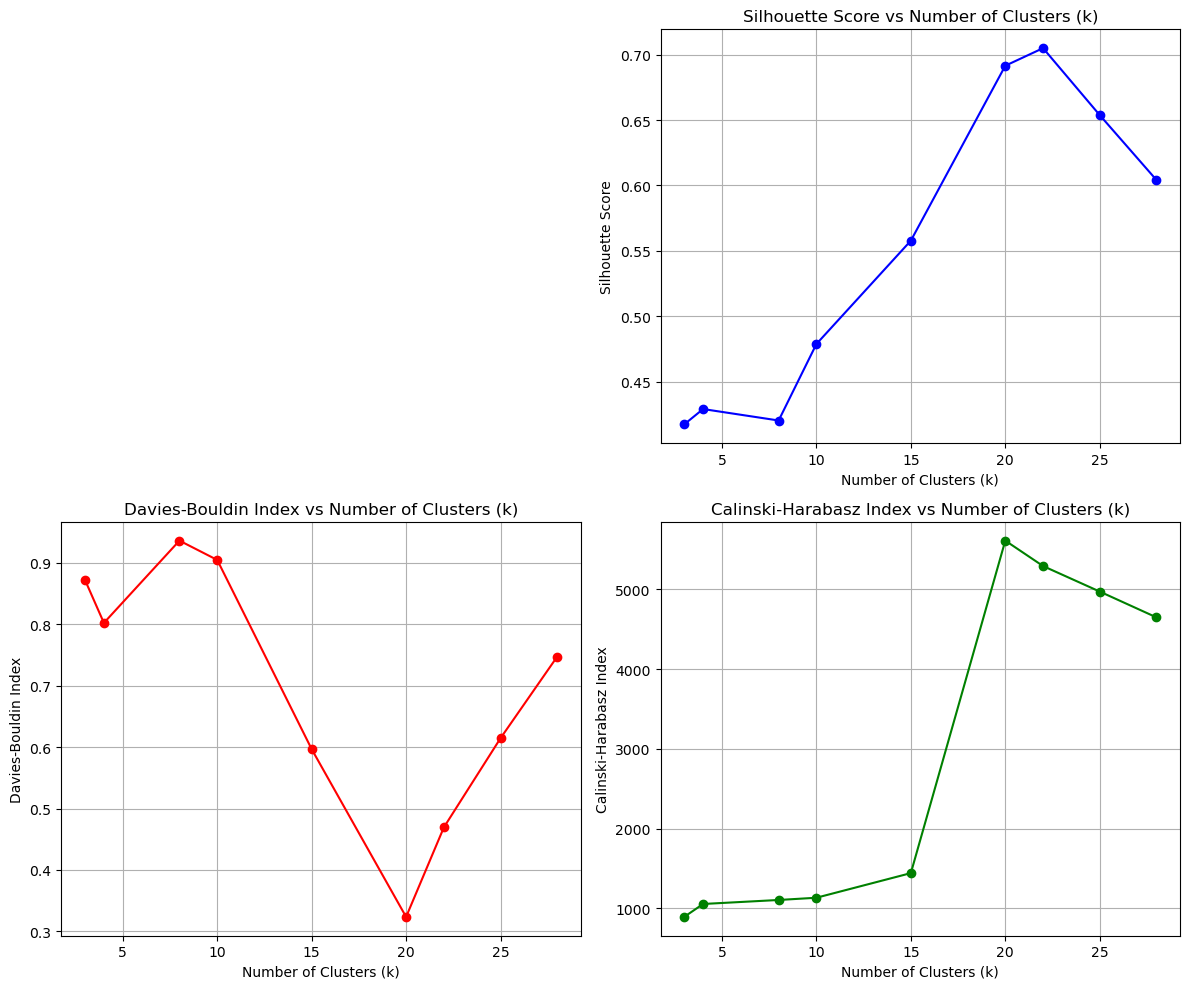

In [139]:
ks = [3,4,8,10,15,20,22,25,28]
evaluate_clustering("twenty", "k_means", ks)

## II.3. Limites de la méthode k-Means

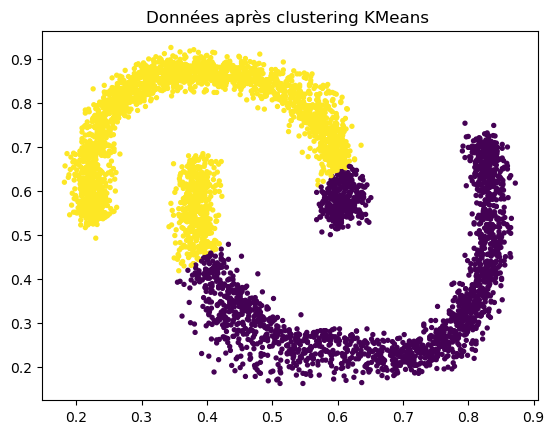

Nb clusters = 2 , Nb iter = 7 , Runtime = 3.23 ms


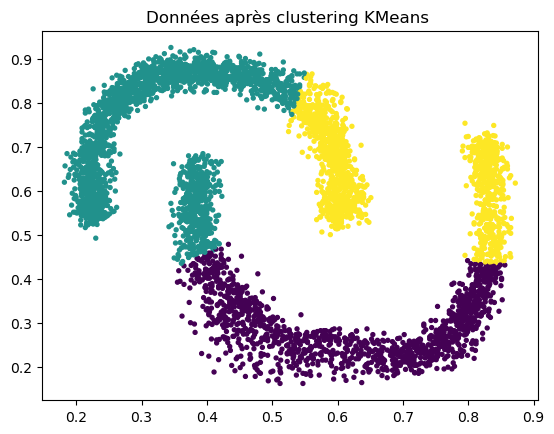

Nb clusters = 3 , Nb iter = 24 , Runtime = 2.91 ms


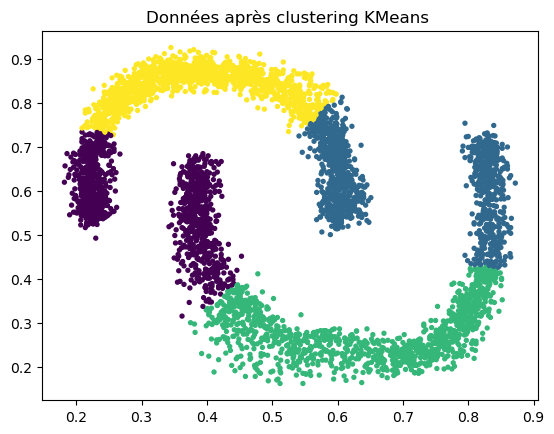

Nb clusters = 4 , Nb iter = 10 , Runtime = 2.14 ms


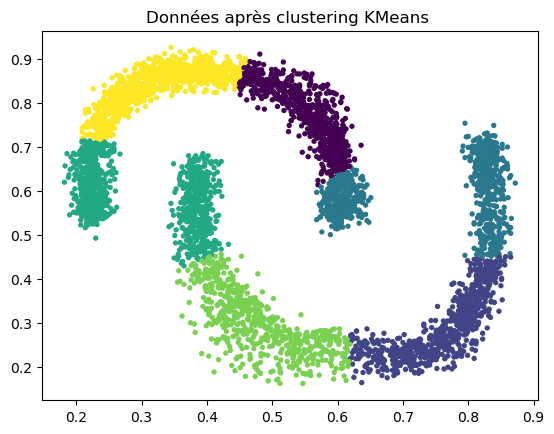

Nb clusters = 6 , Nb iter = 21 , Runtime = 3.28 ms


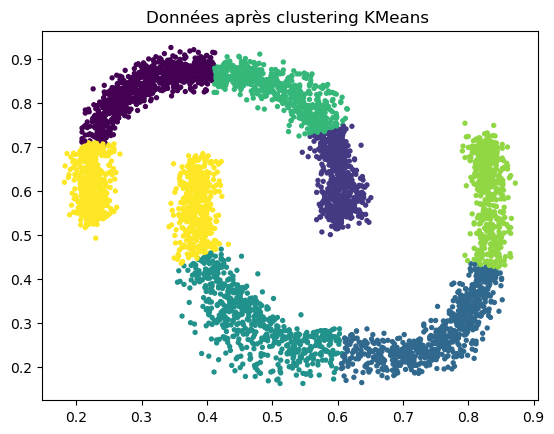

Nb clusters = 7 , Nb iter = 20 , Runtime = 3.05 ms


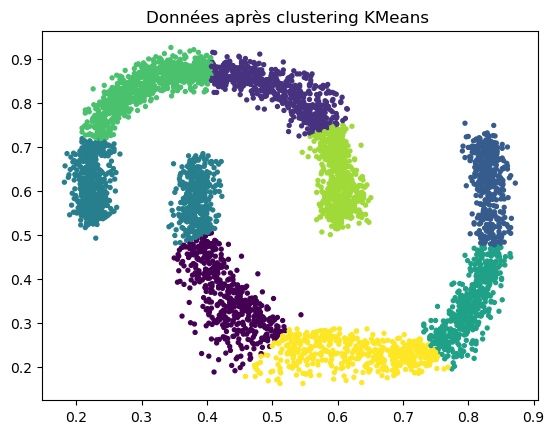

Nb clusters = 8 , Nb iter = 19 , Runtime = 3.07 ms


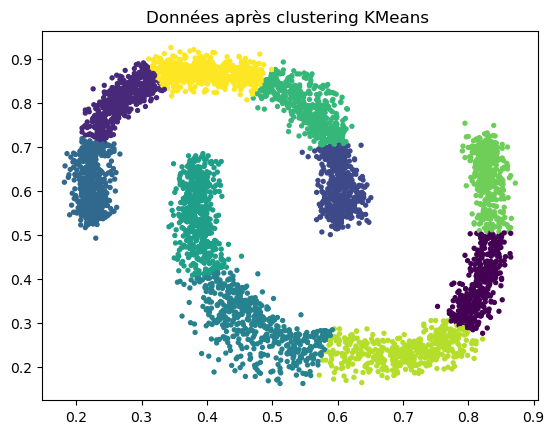

Nb clusters = 10 , Nb iter = 24 , Runtime = 3.61 ms


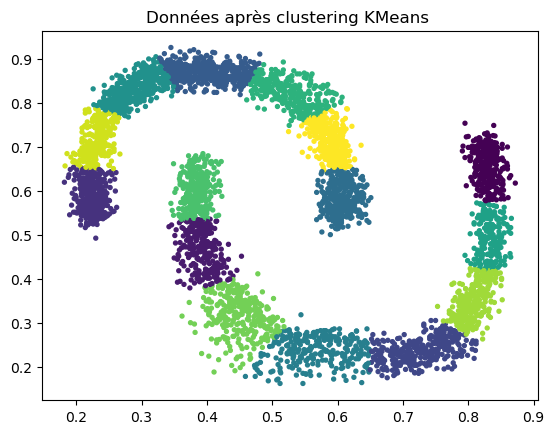

Nb clusters = 15 , Nb iter = 12 , Runtime = 3.64 ms


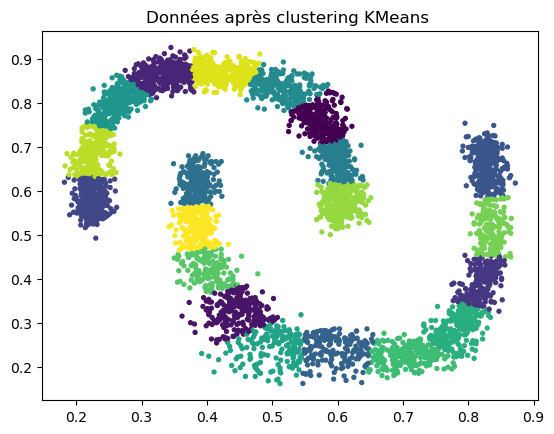

Nb clusters = 20 , Nb iter = 17 , Runtime = 4.36 ms


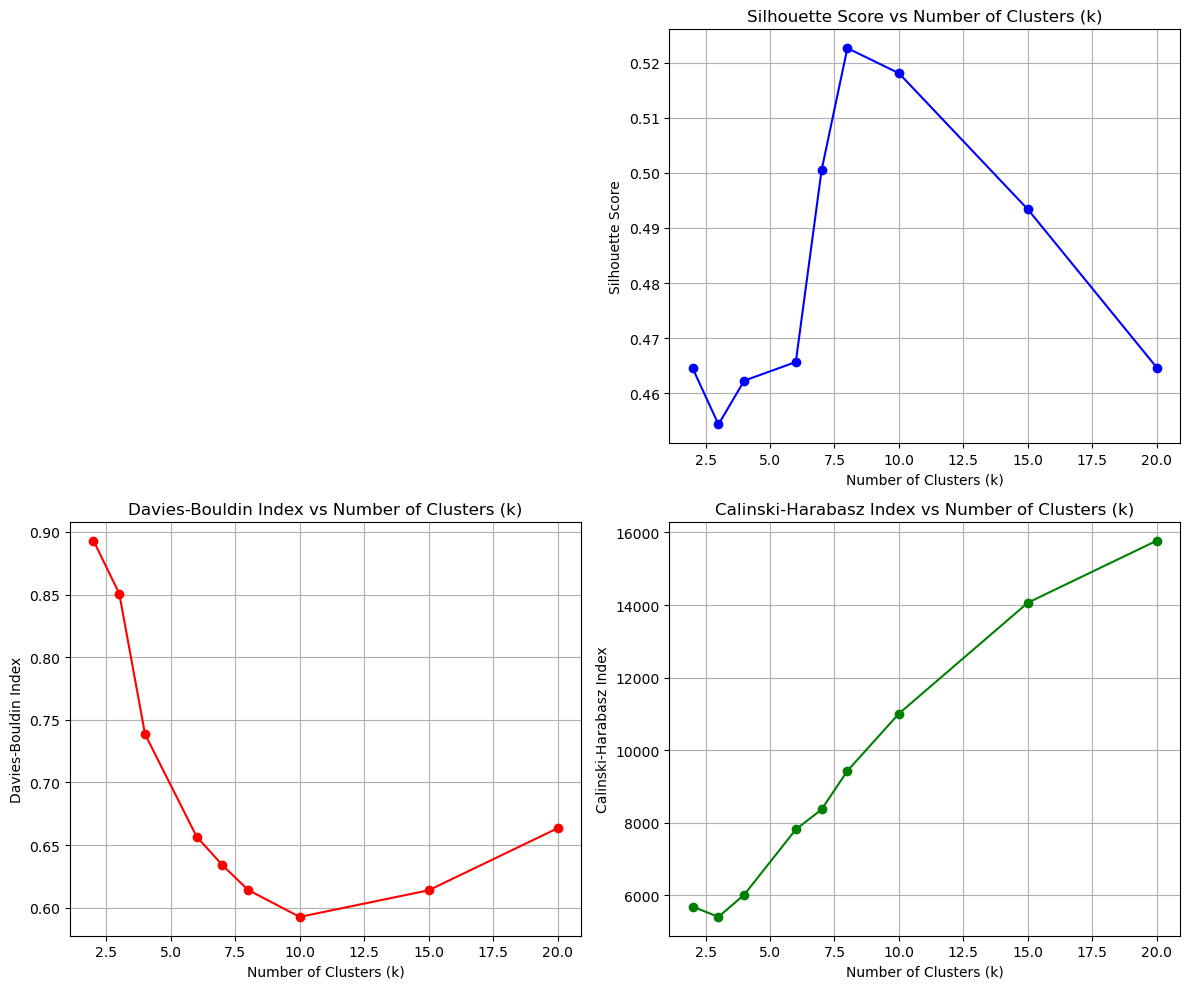

In [140]:
ks = [2,3,4,6,7,8,10,15,20]
evaluate_clustering("banana", "k_means", ks)

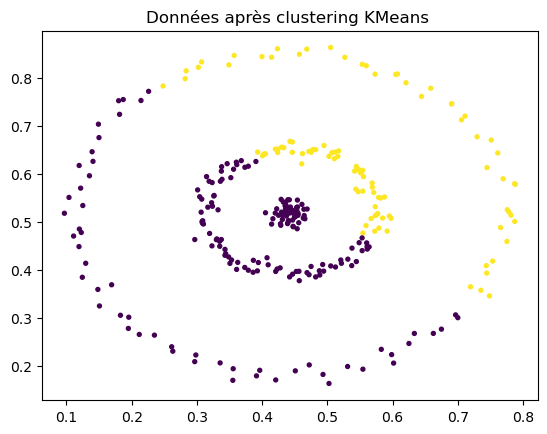

Nb clusters = 2 , Nb iter = 6 , Runtime = 2.41 ms


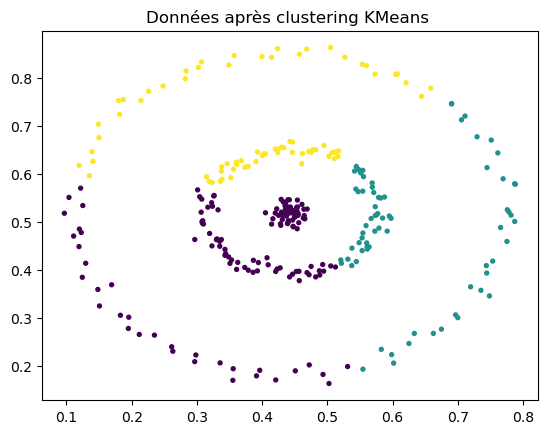

Nb clusters = 3 , Nb iter = 13 , Runtime = 2.35 ms


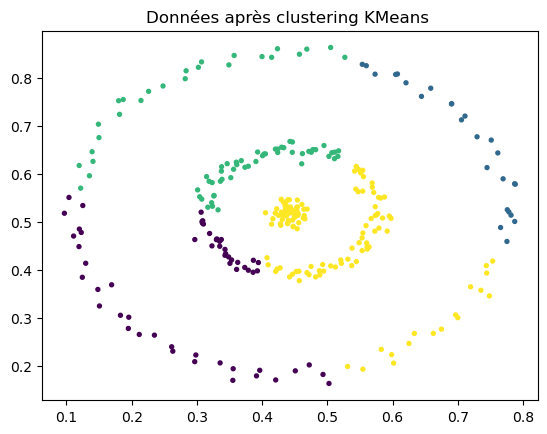

Nb clusters = 4 , Nb iter = 6 , Runtime = 2.19 ms


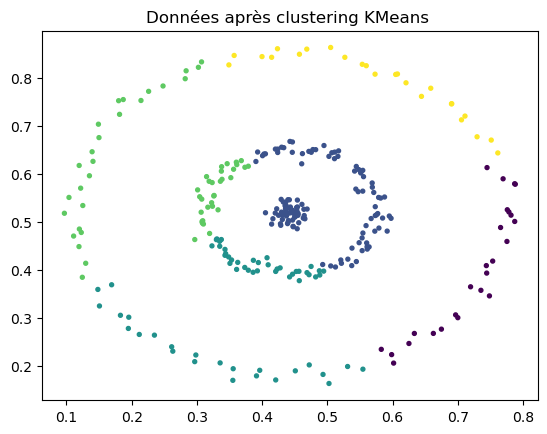

Nb clusters = 5 , Nb iter = 7 , Runtime = 2.29 ms


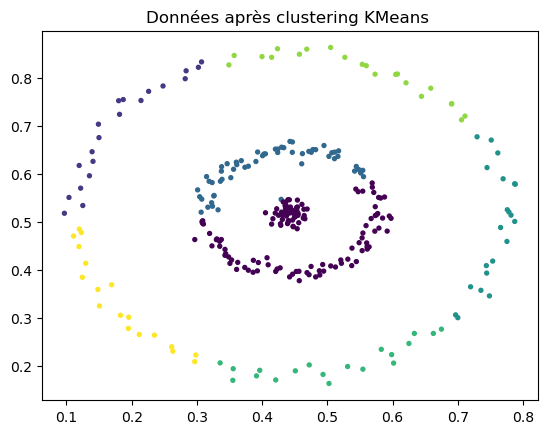

Nb clusters = 7 , Nb iter = 12 , Runtime = 2.62 ms


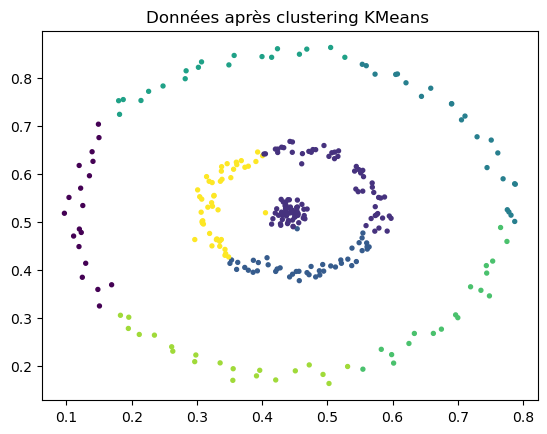

Nb clusters = 8 , Nb iter = 7 , Runtime = 2.56 ms


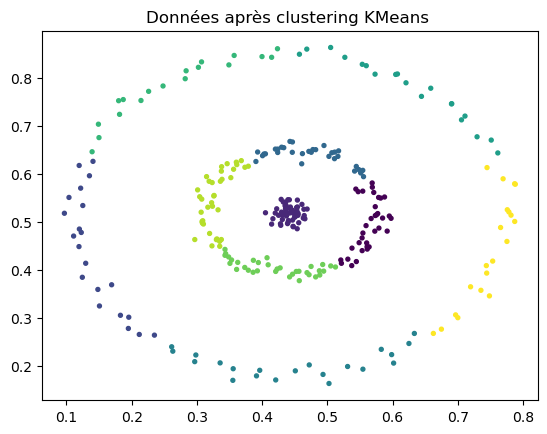

Nb clusters = 10 , Nb iter = 5 , Runtime = 2.5 ms


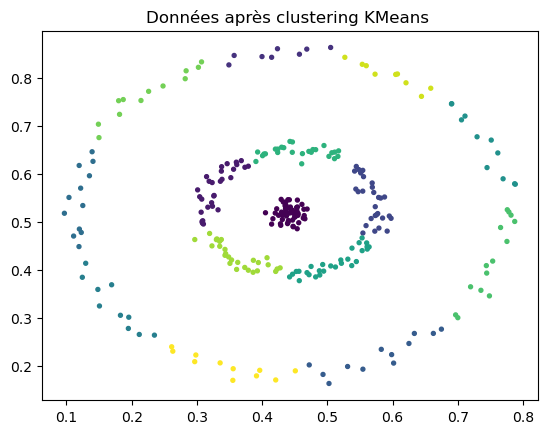

Nb clusters = 15 , Nb iter = 11 , Runtime = 2.94 ms


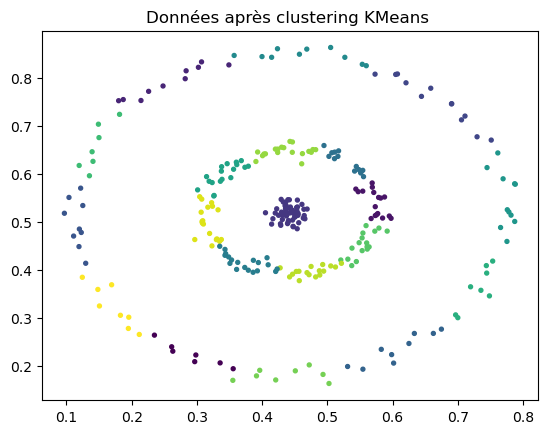

Nb clusters = 20 , Nb iter = 8 , Runtime = 3.18 ms


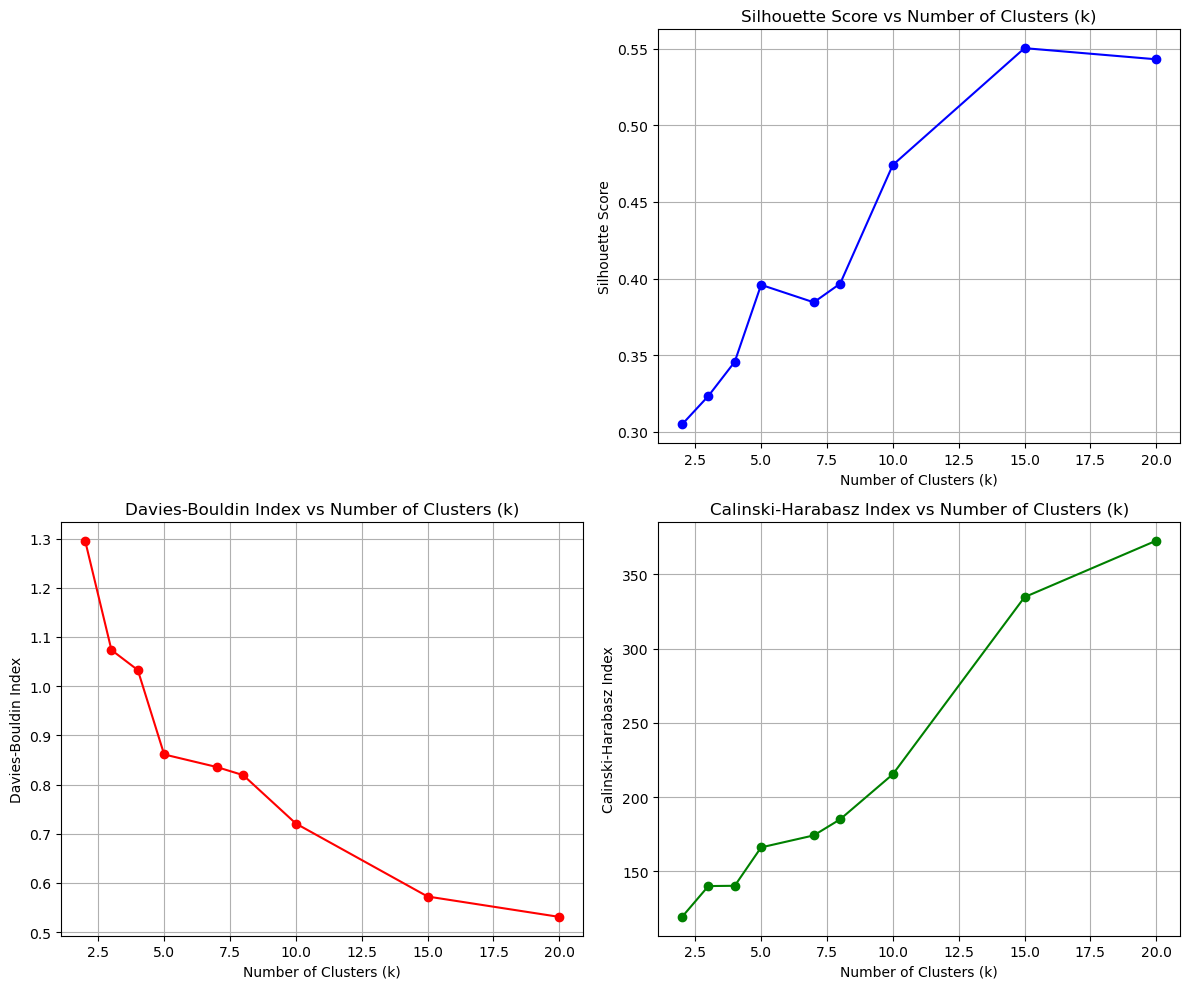

In [141]:
ks = [2,3,4,5,7,8,10,15,20]
evaluate_clustering("zelnik1", "k_means", ks)

# III. Clustering agglomératif

Dendrogramme 'single' données initiales


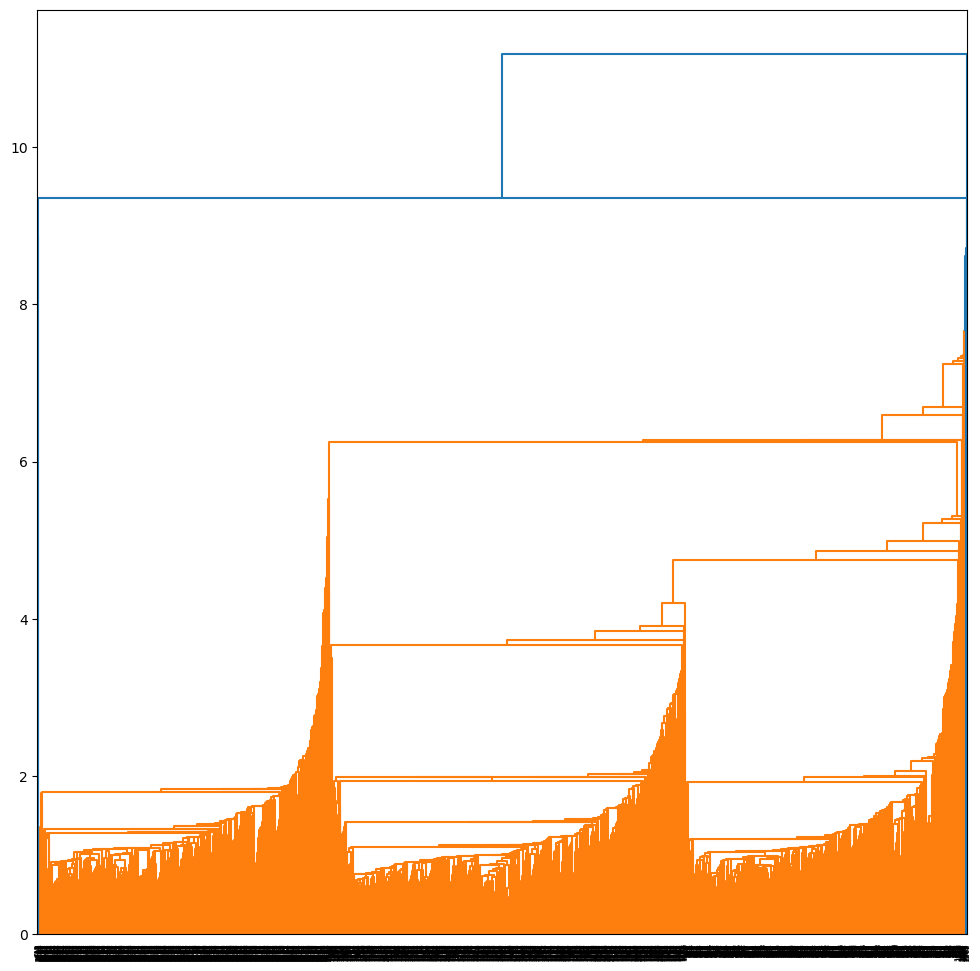

In [79]:
import scipy.cluster.hierarchy as shc
import time
from sklearn import cluster
import matplotlib.pyplot as plt

# Données dans datanp
print("Dendrogramme 'single' données initiales")

# Compute the linkage matrix
linked_mat = shc.linkage(datanp, 'single')

# Plot the dendrogram
plt.figure(figsize=(12, 12))
shc.dendrogram(
    linked_mat,
    orientation='top',
    distance_sort='descending',
    show_leaf_counts=False
)
plt.show()

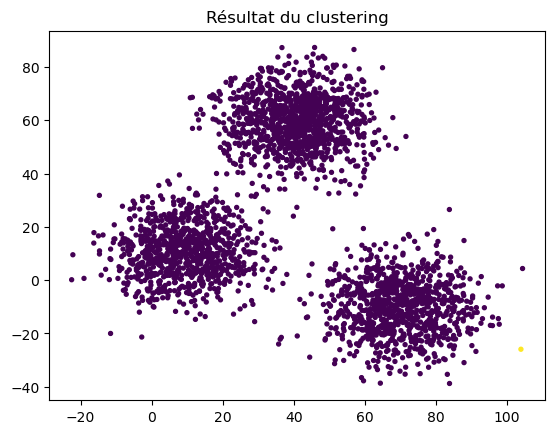

Nb clusters = 2 , Nb feuilles = 3000 , Runtime = 39.61 ms


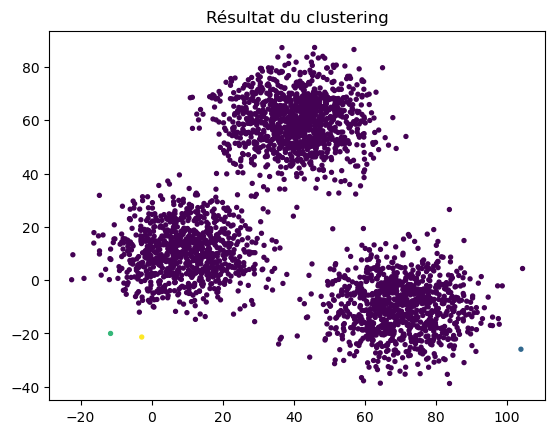

Nb clusters = 4 , Nb feuilles = 3000 , Runtime = 23.69 ms


In [80]:
# Set distance_threshold (0 ensures we compute the full tree)
tps1 = time.time()
model = cluster.AgglomerativeClustering(
    distance_threshold=10,
    linkage='single',
    n_clusters=None
)
model = model.fit(datanp)
tps2 = time.time()

# Retrieve clustering results
labels = model.labels_
k = model.n_clusters_
leaves = model.n_leaves_

# Display clustering results
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Résultat du clustering")
plt.show()

# Print clustering information
print("Nb clusters =", k, ", Nb feuilles =", leaves, 
      ", Runtime =", round((tps2 - tps1) * 1000, 2), "ms")

# Set the number of clusters
k = 4
tps1 = time.time()
model = cluster.AgglomerativeClustering(
    linkage='single',
    n_clusters=k
)
model = model.fit(datanp)
tps2 = time.time()

# Retrieve clustering results for k clusters
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_

# Display clustering results
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Résultat du clustering")
plt.show()

# Print clustering information
print("Nb clusters =", k, ", Nb feuilles =", leaves, 
      ", Runtime =", round((tps2 - tps1) * 1000, 2), "ms")


## III.2.Intérêts de la méthode

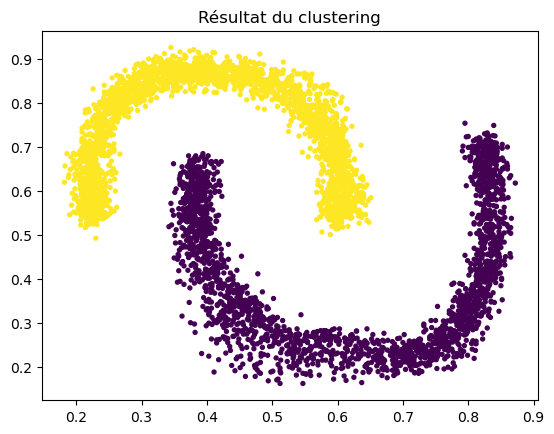

Nb clusters = 2 , Nb iter = 3 , Runtime = 50.17 ms


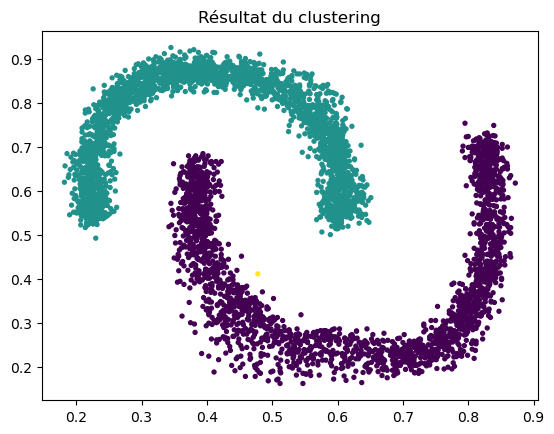

Nb clusters = 3 , Nb iter = 3 , Runtime = 48.98 ms


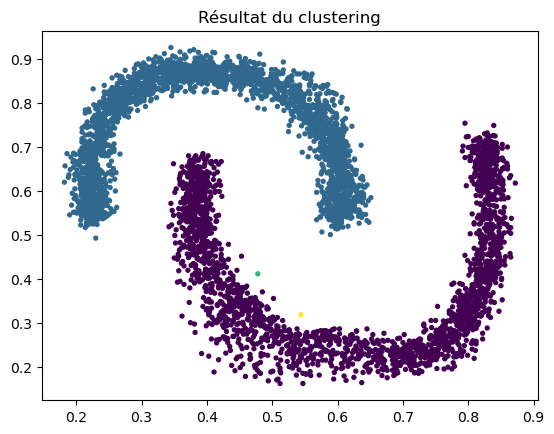

Nb clusters = 4 , Nb iter = 3 , Runtime = 49.21 ms


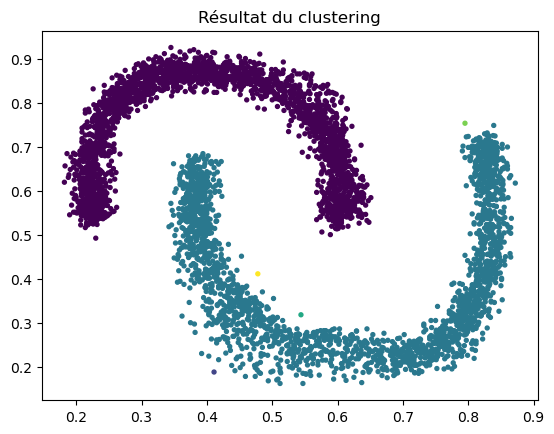

Nb clusters = 6 , Nb iter = 3 , Runtime = 49.03 ms


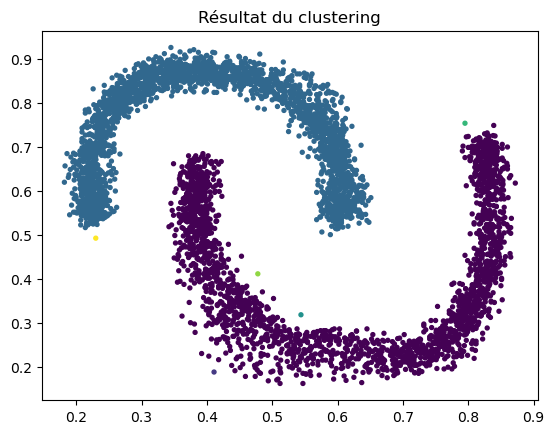

Nb clusters = 7 , Nb iter = 3 , Runtime = 49.15 ms


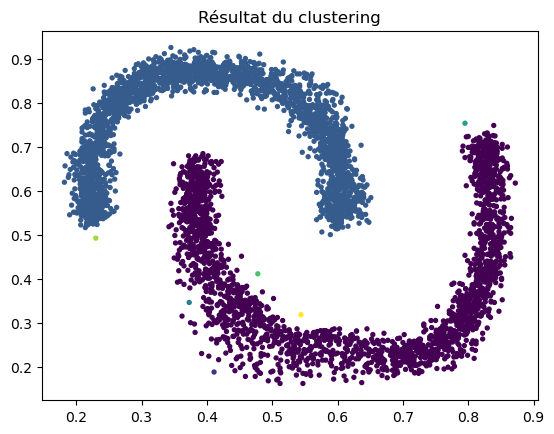

Nb clusters = 8 , Nb iter = 3 , Runtime = 49.45 ms


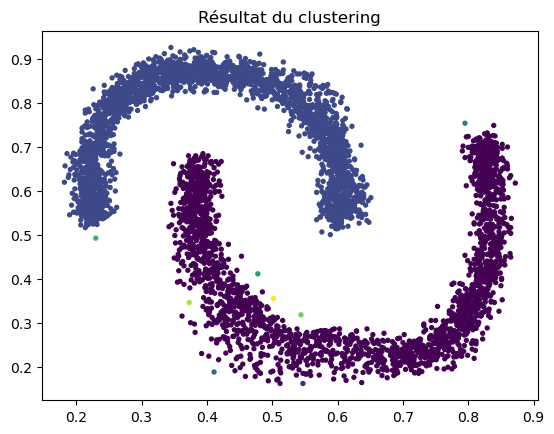

Nb clusters = 10 , Nb iter = 3 , Runtime = 50.27 ms


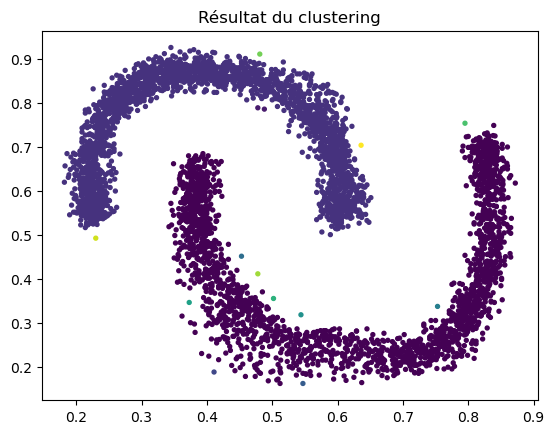

Nb clusters = 15 , Nb iter = 3 , Runtime = 48.88 ms


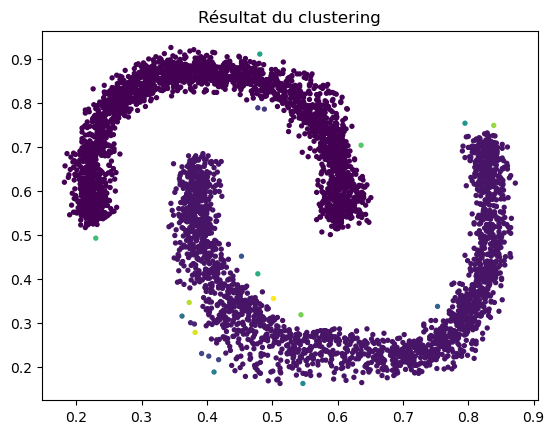

Nb clusters = 20 , Nb iter = 3 , Runtime = 49.29 ms


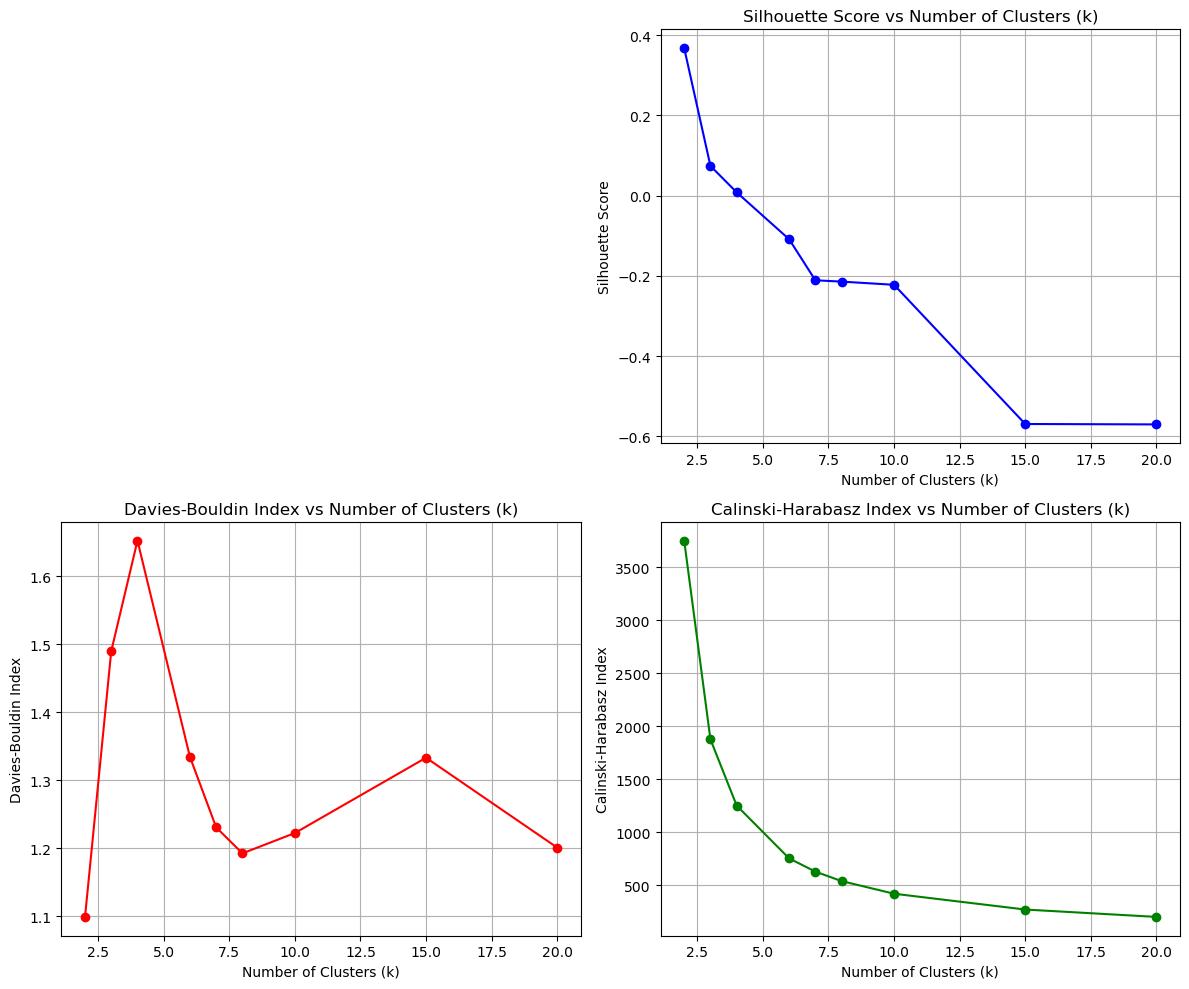

In [142]:
ks = [2,3,4,6,7,8,10,15,20]
evaluate_clustering("banana", "agglomerative", ks)

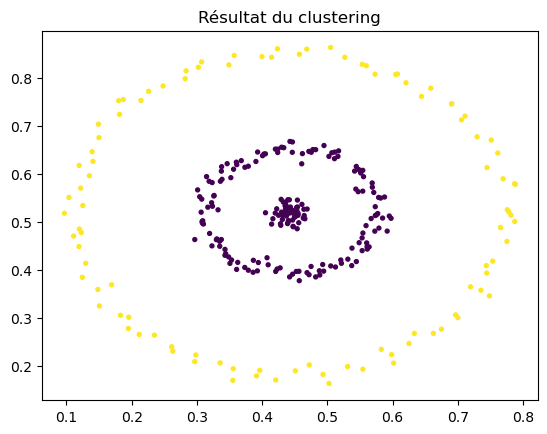

Nb clusters = 2 , Nb iter = 3 , Runtime = 2.62 ms


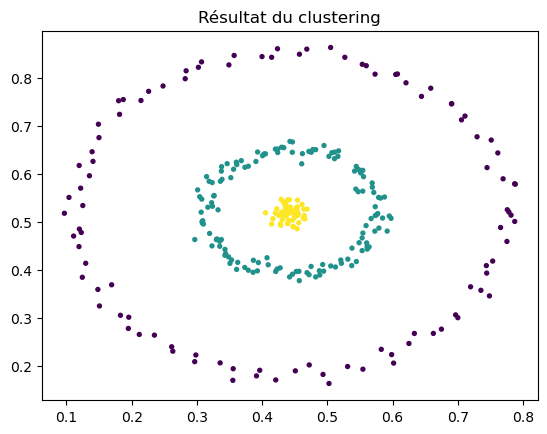

Nb clusters = 3 , Nb iter = 3 , Runtime = 0.66 ms


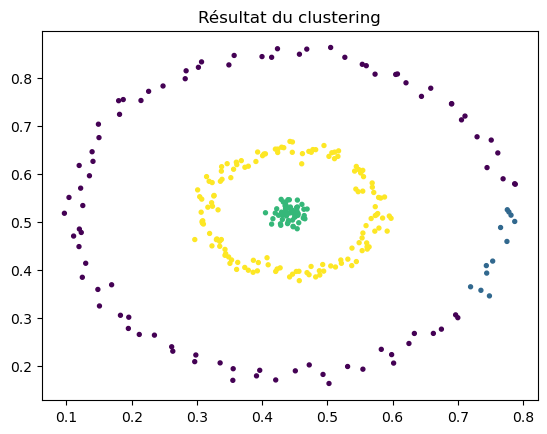

Nb clusters = 4 , Nb iter = 3 , Runtime = 0.63 ms


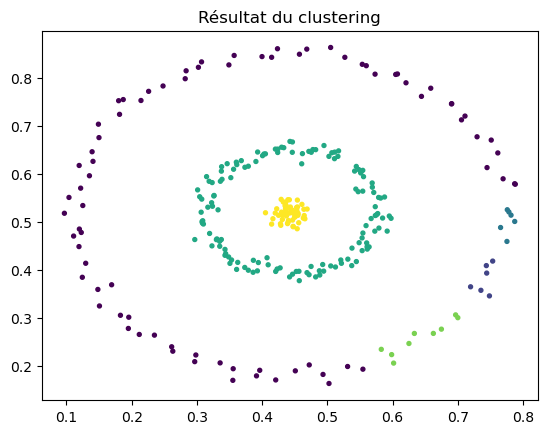

Nb clusters = 6 , Nb iter = 3 , Runtime = 0.65 ms


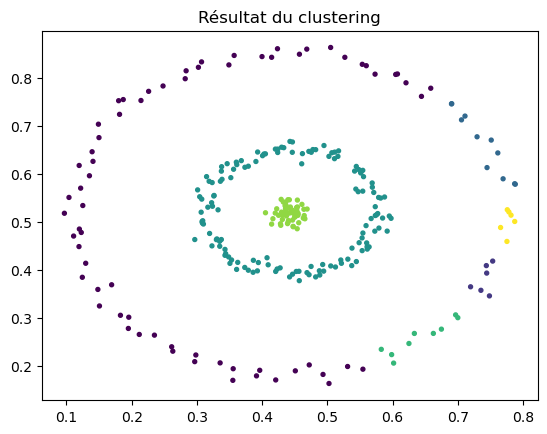

Nb clusters = 7 , Nb iter = 3 , Runtime = 0.61 ms


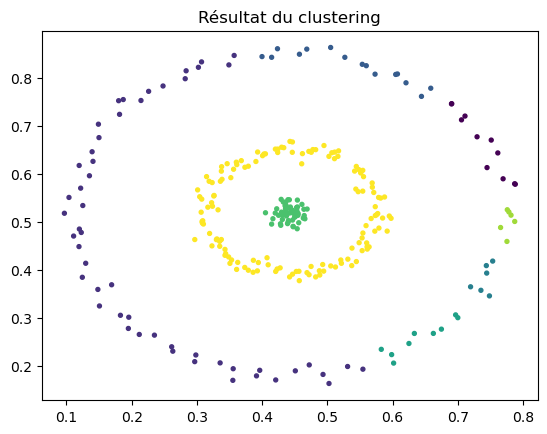

Nb clusters = 8 , Nb iter = 3 , Runtime = 0.63 ms


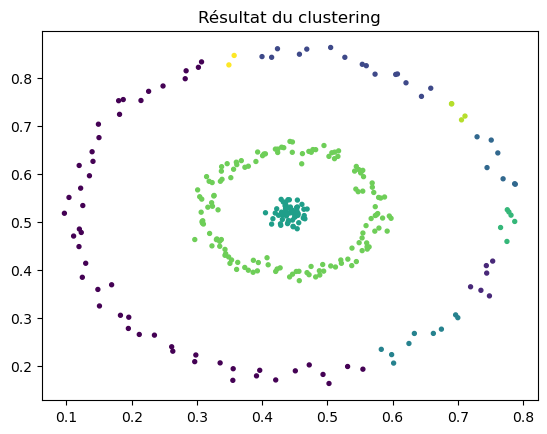

Nb clusters = 10 , Nb iter = 3 , Runtime = 0.64 ms


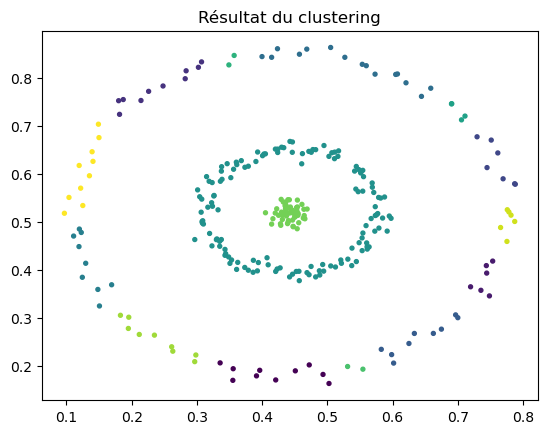

Nb clusters = 15 , Nb iter = 3 , Runtime = 0.62 ms


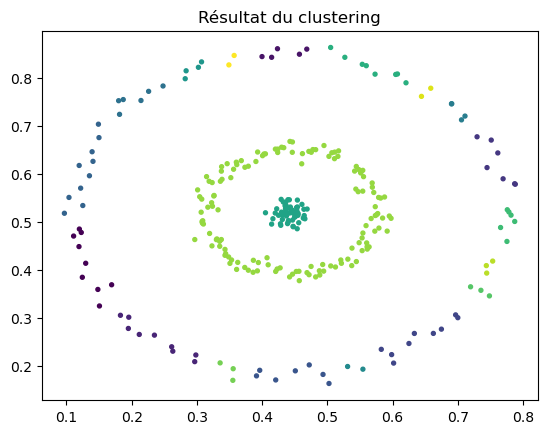

Nb clusters = 20 , Nb iter = 3 , Runtime = 0.99 ms


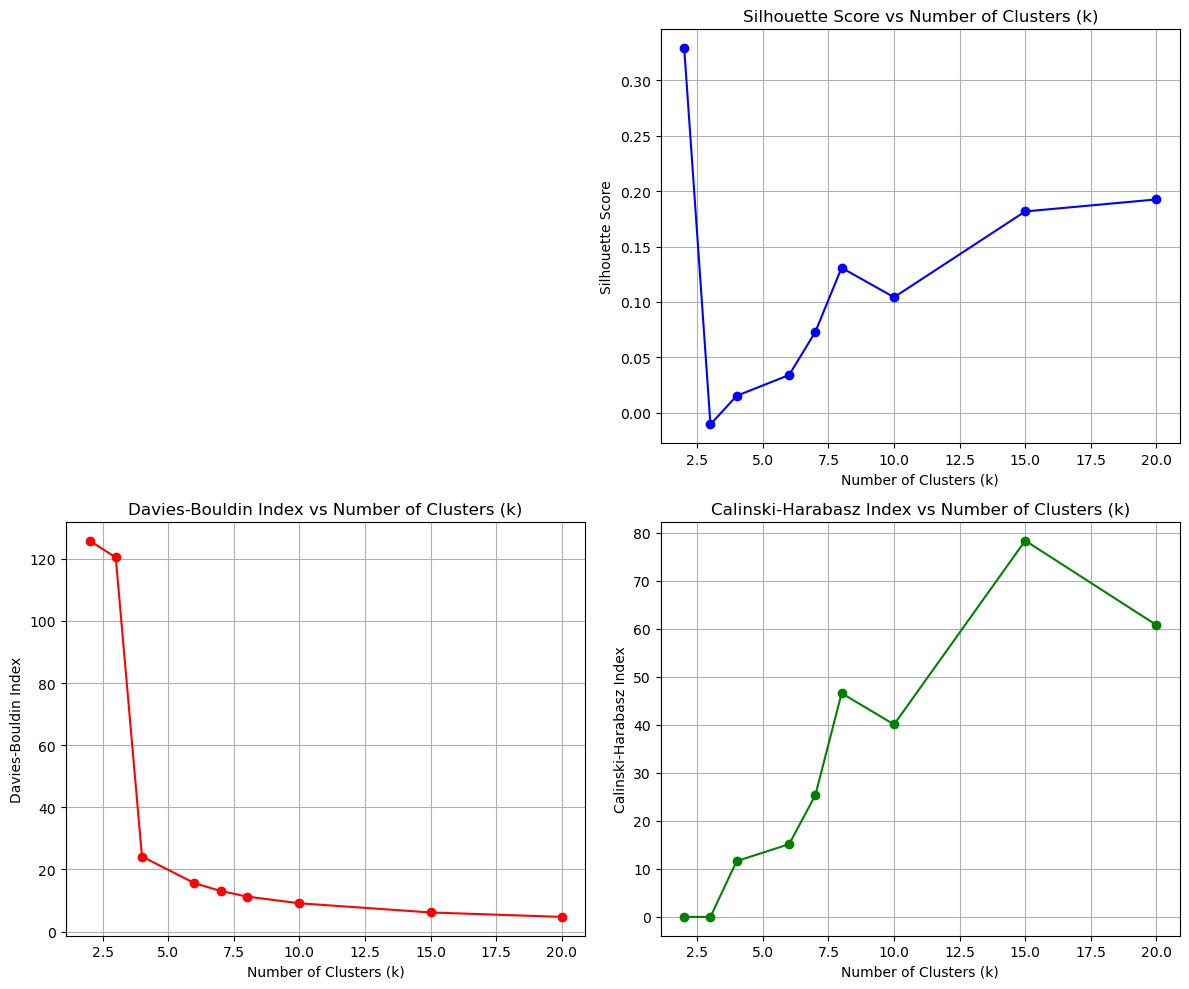

In [143]:
ks = [2,3,4,6,7,8,10,15,20]
evaluate_clustering("zelnik1", "agglomerative", ks)

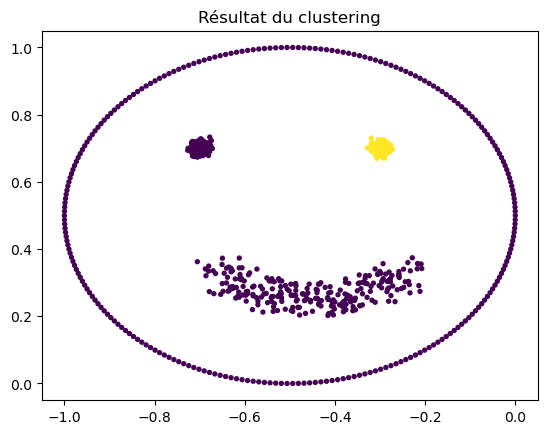

Nb clusters = 2 , Nb iter = 3 , Runtime = 3.61 ms


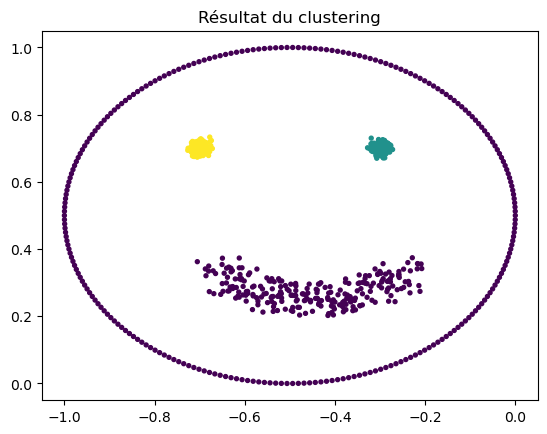

Nb clusters = 3 , Nb iter = 3 , Runtime = 3.25 ms


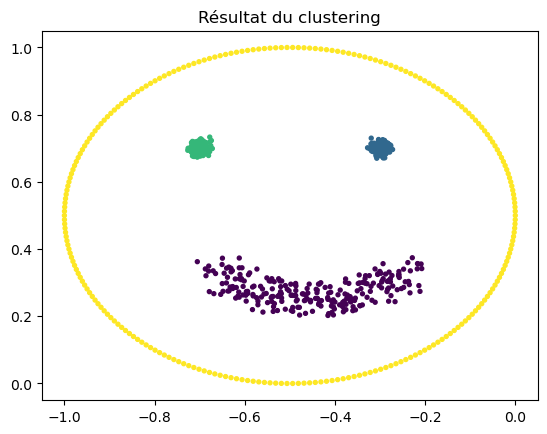

Nb clusters = 4 , Nb iter = 3 , Runtime = 3.22 ms


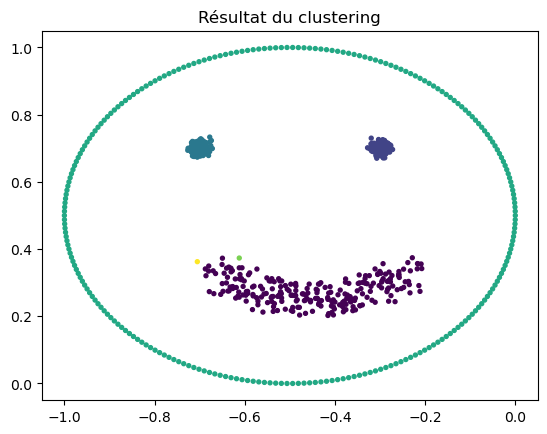

Nb clusters = 6 , Nb iter = 3 , Runtime = 3.22 ms


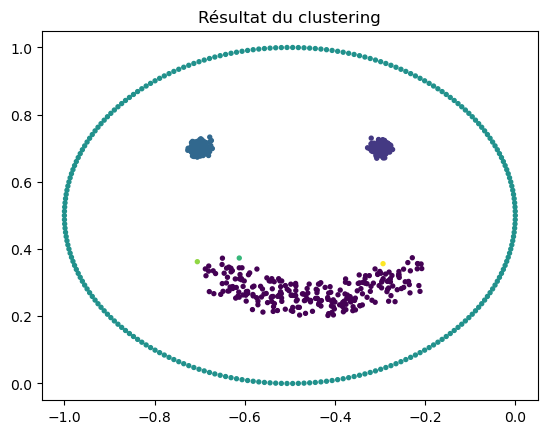

Nb clusters = 7 , Nb iter = 3 , Runtime = 4.51 ms


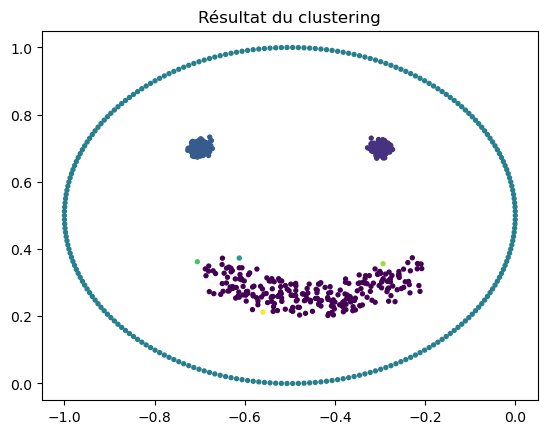

Nb clusters = 8 , Nb iter = 3 , Runtime = 4.53 ms


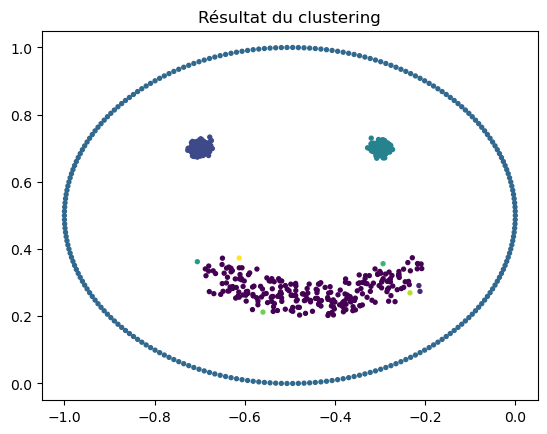

Nb clusters = 10 , Nb iter = 3 , Runtime = 4.33 ms


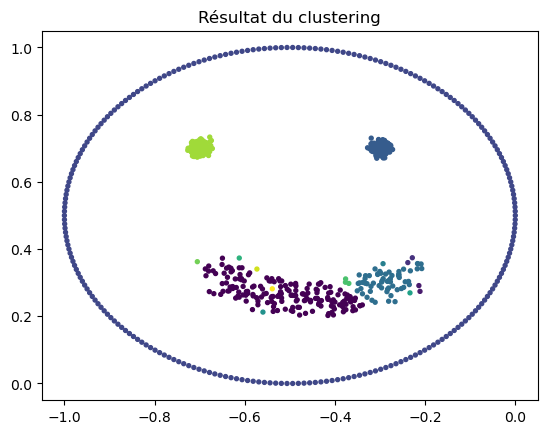

Nb clusters = 15 , Nb iter = 3 , Runtime = 4.42 ms


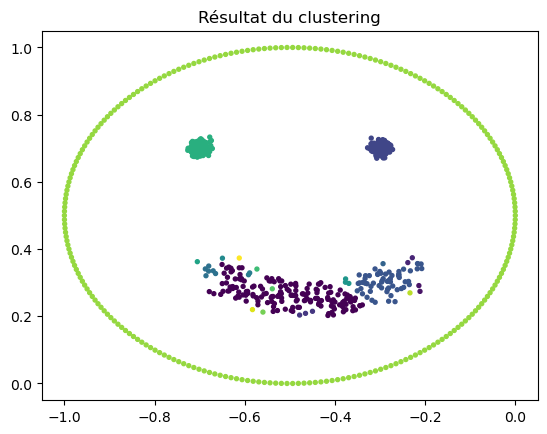

Nb clusters = 20 , Nb iter = 3 , Runtime = 4.44 ms


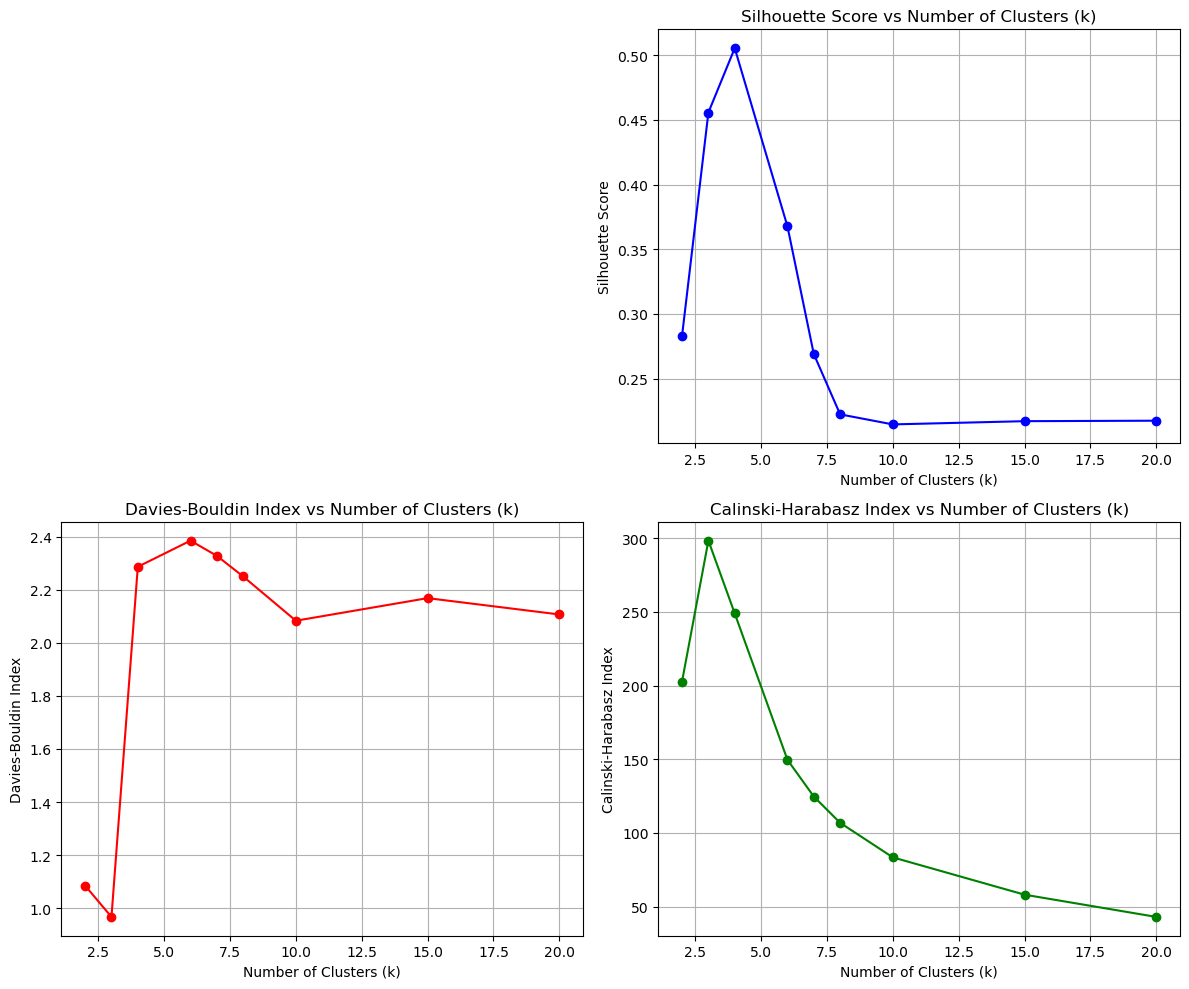

In [150]:
ks = [2,3,4,6,7,8,10,15,20]
evaluate_clustering("smile1", "agglomerative", ks)

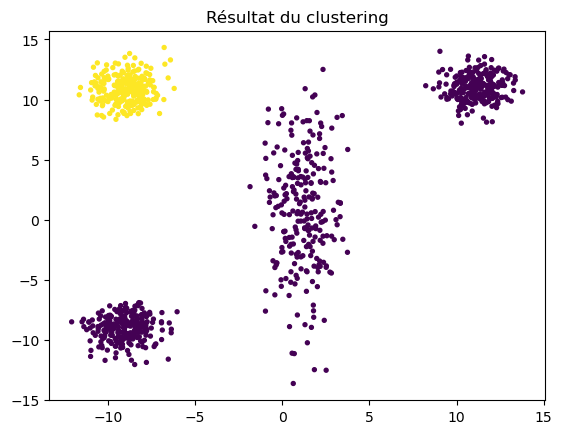

Nb clusters = 2 , Nb iter = 3 , Runtime = 3.95 ms


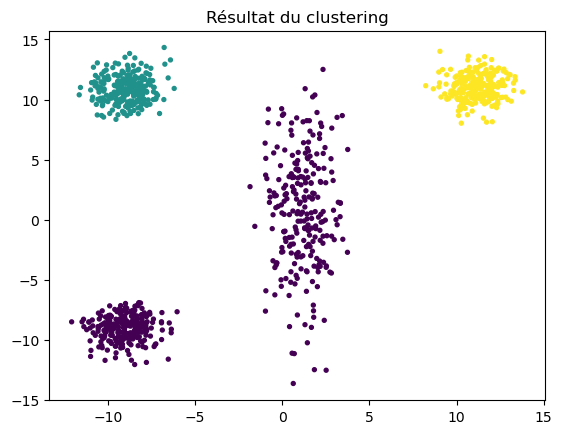

Nb clusters = 3 , Nb iter = 3 , Runtime = 4.33 ms


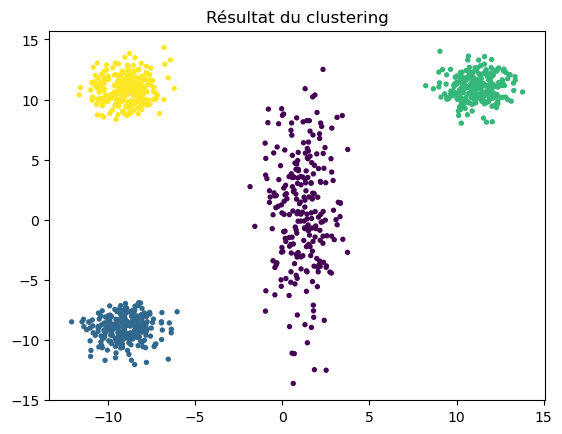

Nb clusters = 4 , Nb iter = 3 , Runtime = 4.35 ms


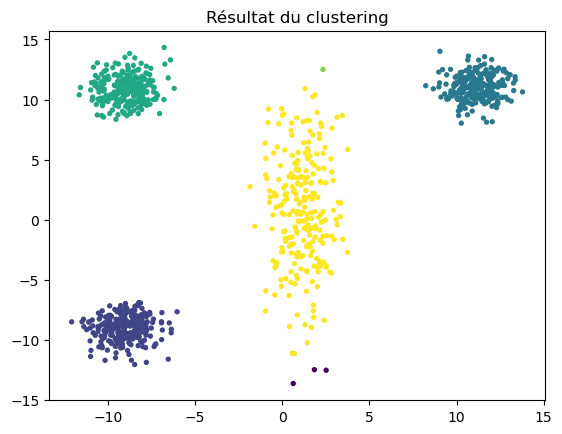

Nb clusters = 6 , Nb iter = 3 , Runtime = 4.59 ms


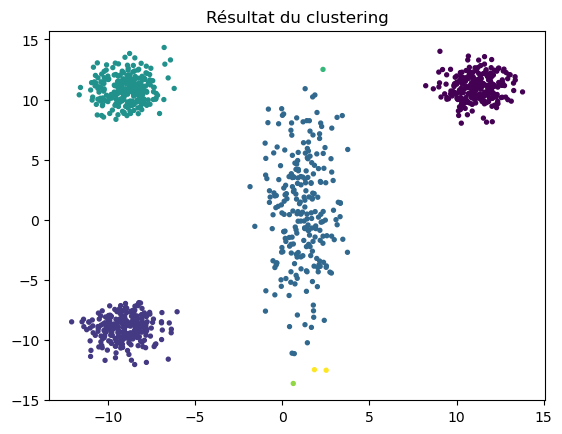

Nb clusters = 7 , Nb iter = 3 , Runtime = 4.55 ms


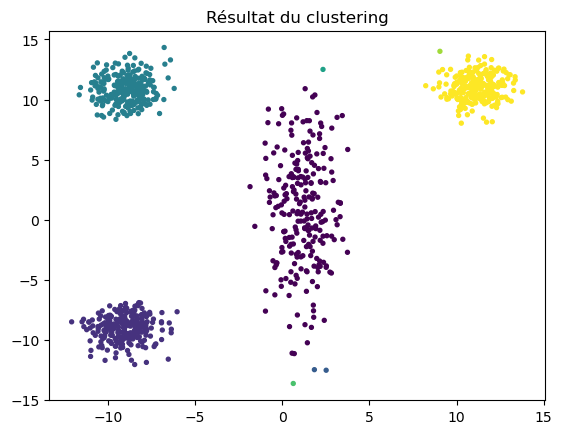

Nb clusters = 8 , Nb iter = 3 , Runtime = 4.54 ms


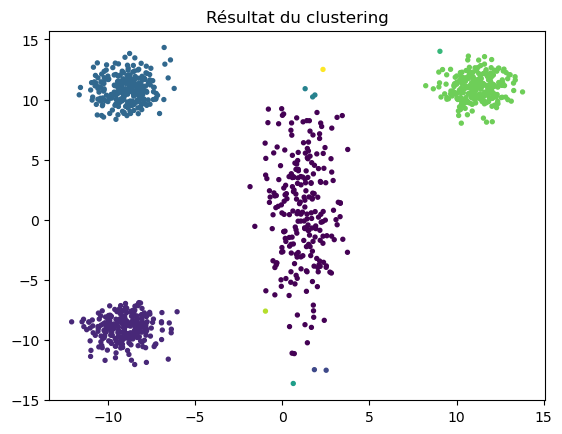

Nb clusters = 10 , Nb iter = 3 , Runtime = 4.78 ms


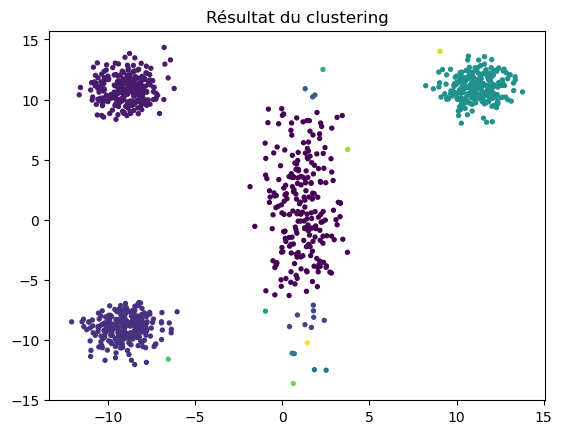

Nb clusters = 15 , Nb iter = 3 , Runtime = 4.93 ms


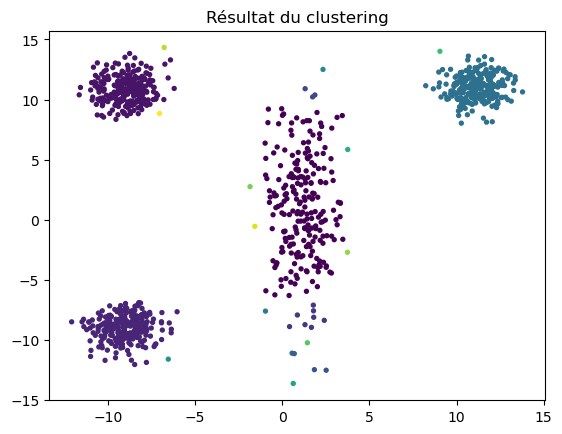

Nb clusters = 20 , Nb iter = 3 , Runtime = 3.26 ms


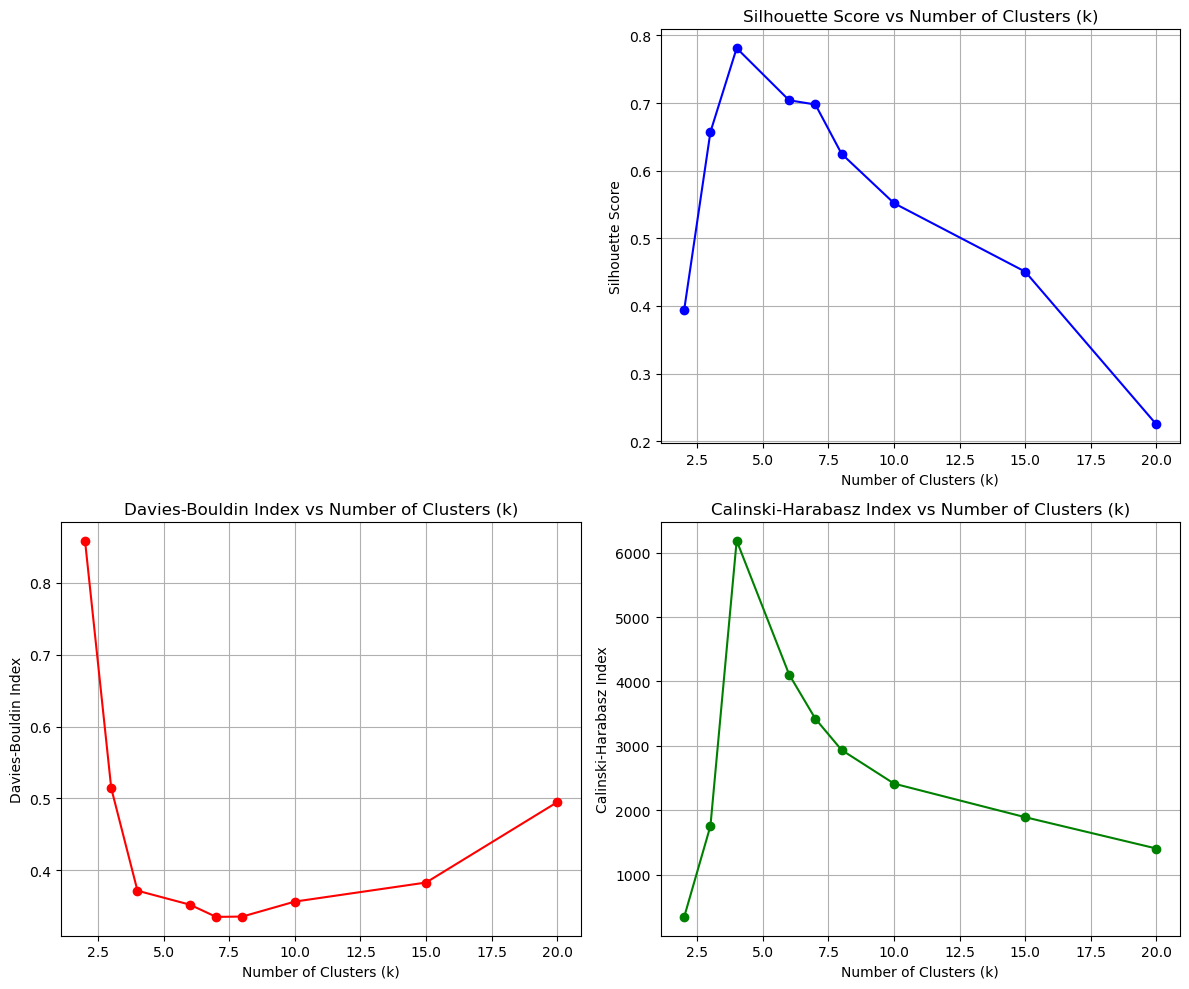

In [149]:
ks = [2,3,4,6,7,8,10,15,20]
evaluate_clustering("triangle1", "agglomerative", ks)